In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft
from scipy.interpolate import interp1d
from scipy.stats import entropy, iqr, kurtosis, mode, skew
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (Activation, BatchNormalization, Bidirectional,
                                     Conv1D, Conv2D, Dense, Dropout,
                                     Flatten, GlobalAveragePooling1D, LSTM,
                                     MaxPool1D, MaxPooling2D, Reshape,
                                     TimeDistributed)
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import pickle
from pandas import read_csv, unique
from scipy.signal import argrelextrema, butter, find_peaks, lfilter, lfilter_zi
from tensorflow import keras
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_accuracy
from kerastuner import RandomSearch, Hyperband
import kerastuner

2023-11-07 14:34:17.838463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 14:34:18.558846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-07 14:34:18.558867: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-07 14:34:21.014103: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
sub_activities_model = keras.models.load_model('Trained_Task3_Task3_aio.keras')
physical_model = keras.models.load_model('Trained_Task1_2.keras')

In [10]:
sub_activities_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            19200     
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           98816     
                                                                 
 conv1d (Conv1D)             (None, 25, 224)           57568     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 224)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 240)           215280    
                                                                 
 global_average_pooling1d (G  (None, 240)              0         
 lobalAveragePooling1D)                                 

In [15]:
X_respeck = pickle.load(open("X_respeck_all", "rb"))
y_respeck = pickle.load(open("y_respeck_all", "rb"))
X_train, X_temp, y_train, y_temp = train_test_split(X_respeck, y_respeck, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
subactiv = ['coughing', 'eating', 'hyperventilating', 'laughing', 'normal', 'singing', 'talking']
phys = ['ascending stairs', 'descending stairs', 'lying down back',
        'lying down on left', 'lying down on stomach', 'lying down right',
        'miscellaneous movements', 'normal walking', 'running',
        'shuffle walking', 'sitting', 'standing']

In [21]:
phy_prod = physical_model.predict(X_test)
sub_prod = sub_activities_model.predict(X_test)
physical_action = np.argmax(phy_prod, axis=1)
physical_prediction = [phys[i] for i in physical_action]
subactivity_prediction = []
for i in range(len(y_test)):
    subactivity_prediction.append(subactiv[np.argmax(sub_prod[i])])

counter = 0 
for i in range(len(subactivity_prediction)):
    if physical_prediction[i] in ['ascending stairs', 'descending stairs','miscellaneous movements', 'normal walking', 'running', 'shuffle walking']:
        subactivity_prediction[i] = 'normal'
        
    print((physical_prediction[i] + ' ' + subactivity_prediction[i]), y_test[i][0])
    if (physical_prediction[i] + ' ' + subactivity_prediction[i]) == y_test[i][0]:
        counter+=1
prod = [[physical_prediction[i] + ' ' + subactivity_prediction[i]] for i in range(len(physical_prediction))]

print(counter/len(y_test))


180/180 [==============================] - 4s 23ms/step
lying down on left hyperventilating lying down on left hyperventilating
lying down on stomach singing lying down on stomach singing
lying down back normal lying down back normal
lying down back singing lying down back singing
lying down on stomach normal lying down on stomach hyperventilating
miscellaneous movements normal miscellaneous movements normal
lying down on stomach singing lying down on stomach singing
normal walking normal normal walking normal
miscellaneous movements normal miscellaneous movements normal
sitting normal sitting normal
sitting hyperventilating sitting hyperventilating
running normal running normal
lying down on left singing lying down on left singing
lying down on stomach singing lying down on stomach singing
lying down on stomach hyperventilating lying down on stomach hyperventilating
lying down back singing lying down back singing
sitting eating sitting eating
sitting laughing sitting laughing
lying do

In [22]:
prod = [[physical_prediction[i] + ' ' + subactivity_prediction[i]] for i in range(len(physical_prediction))]

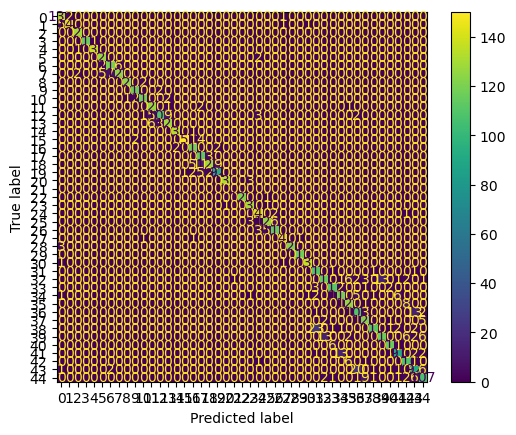

In [29]:
cm = confusion_matrix(y_test, prod)
cm_disp = ConfusionMatrixDisplay(confusion_matrix= cm)
cm_disp.plot()
plt.show()